## Лекція 61. Кодування та компресія

### Завдання:

#### 1.	Напишіть код для стиснення зображення з використанням алгоритму JPEG.
#### 2.	Використовуючи бібліотеку gzip, напишіть код для стиснення текстового файлу.
#### 3.	Реалізуйте алгоритм Хаффмана для стиснення текстових даних. Напишіть код для стиснення та розпакування текстового файлу за допомогою цього алгоритму.

In [1]:
import numpy as np
import cv2
import os
from PIL import Image
from matplotlib import pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

#### 1.	Напишіть код для стиснення зображення з використанням алгоритму JPEG.

Розмір файлу: 1719982 байт
Розмір зображення: (5184, 3456)


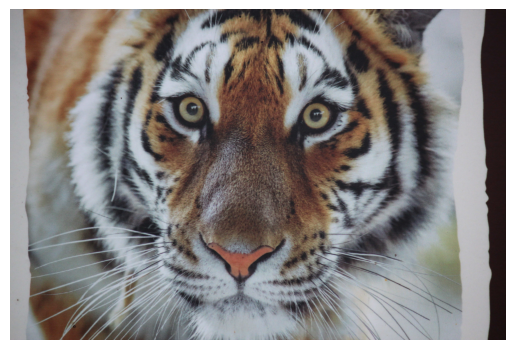

In [2]:
# Відкриття зображення
image = Image.open('933.jpg')
print(f"Розмір файлу: {os.path.getsize('933.jpg')} байт")
print(f"Розмір зображення: {image.size}")
plt.axis('off')
plt.imshow(image);

In [3]:
# Збереження зображення у форматі JPEG з певними параметрами стиснення

image.save('output_image933.jpg', format='JPEG', quality=20, optimize=True)

# Параметр quality визначає якість стиснення від 0 (максимально стиснене) до 100 (максимально якісне), 
# і параметр optimize вказує, чи потрібно використовувати оптимізацію при стисненні.

Розмір файлу: 424881 байт
Розмір зображення: (5184, 3456)


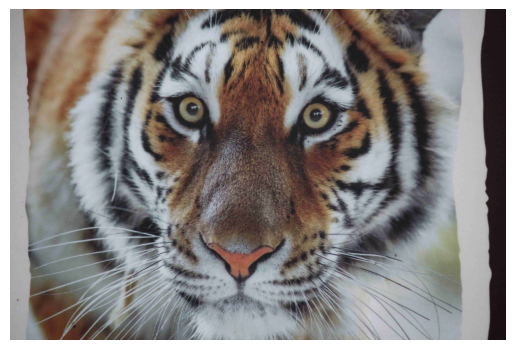

In [4]:
# Виводимо стиснене зображення
image = Image.open('output_image933.jpg')
print(f"Розмір файлу: {os.path.getsize('output_image933.jpg')} байт")
print(f"Розмір зображення: {image.size}")
plt.axis('off')
plt.imshow(image);

#### 2.	Використовуючи бібліотеку gzip, напишіть код для стиснення текстового файлу.

In [5]:
import gzip

# Відкриваємо файл, який ми хочемо стиснути, для читання в текстовому режимі
with open('text_file.txt', 'rt') as file_in:
    # Відкриваємо файл, у який буде записано стиснутий текст
    with gzip.open('compressed_file.gz', 'wt') as file_out:
        # Стиснутий текст буде записуватися в файл 'compressed_file.gz'
        file_out.writelines(file_in)

print('File compression complete.')

File compression complete.


In [6]:
print(f"Розмір початкового файлу: {os.path.getsize('text_file.txt')} байт")
print(f"Розмір стисненого файлу: {os.path.getsize('compressed_file.gz')} байт")

Розмір початкового файлу: 377 байт
Розмір стисненого файлу: 218 байт


#### 3. Реалізуйте алгоритм Хаффмана для стиснення текстових даних. Напишіть код для стиснення та розпакування текстового файлу за допомогою цього алгоритму.

In [7]:
# Node of a Huffman Tree  
class Nodes:  
    def __init__(self, probability, symbol, left = None, right = None):  
        # probability of the symbol  
        self.probability = probability  
  
        # the symbol  
        self.symbol = symbol  
  
        # the left node  
        self.left = left  
  
        # the right node  
        self.right = right  
  
        # the tree direction (0 or 1)  
        self.code = ''  
  
""" A supporting function in order to calculate the probabilities of symbols in specified data """  
def CalculateProbability(the_data):  
    the_symbols = dict()  
    for item in the_data:  
        if the_symbols.get(item) == None:  
            the_symbols[item] = 1  
        else:   
            the_symbols[item] += 1       
    return the_symbols  
  
""" A supporting function in order to print the codes of symbols by travelling a Huffman Tree """  
the_codes = dict()  
  
def CalculateCodes(node, value = ''):  
    # a huffman code for current node  
    newValue = value + str(node.code)  
  
    if(node.left):  
        CalculateCodes(node.left, newValue)  
    if(node.right):  
        CalculateCodes(node.right, newValue)  
  
    if(not node.left and not node.right):  
        the_codes[node.symbol] = newValue  
           
    return the_codes  
  
""" A supporting function in order to get the encoded result """  
def OutputEncoded(the_data, coding):  
    encodingOutput = []  
    for element in the_data:  
        # print(coding[element], end = '')  
        encodingOutput.append(coding[element])  
          
    the_string = ''.join([str(item) for item in encodingOutput])      
    return the_string  
          
""" A supporting function in order to calculate the space difference between compressed and non compressed data"""      
def TotalGain(the_data, coding):  
    # total bit space to store the data before compression  
    beforeCompression = len(the_data) * 8  
    afterCompression = 0  
    the_symbols = coding.keys()  
    for symbol in the_symbols:  
        the_count = the_data.count(symbol)  
        # calculating how many bit is required for that symbol in total  
        afterCompression += the_count * len(coding[symbol])  
    print("Space usage before compression (in bits):", beforeCompression)  
    print("Space usage after compression (in bits):",  afterCompression)  
  
def HuffmanEncoding(the_data):  
    symbolWithProbs = CalculateProbability(the_data)  
    the_symbols = symbolWithProbs.keys()  
    the_probabilities = symbolWithProbs.values()  
    print("symbols: ", the_symbols)  
    print("probabilities: ", the_probabilities)  
      
    the_nodes = []  
      
    # converting symbols and probabilities into huffman tree nodes  
    for symbol in the_symbols:  
        the_nodes.append(Nodes(symbolWithProbs.get(symbol), symbol))  
      
    while len(the_nodes) > 1:  
        # sorting all the nodes in ascending order based on their probability  
        the_nodes = sorted(the_nodes, key = lambda x: x.probability)  
        # for node in nodes:    
        #      print(node.symbol, node.prob)  
      
        # picking two smallest nodes  
        right = the_nodes[0]  
        left = the_nodes[1]  
      
        left.code = 0  
        right.code = 1  
      
        # combining the 2 smallest nodes to create new node  
        newNode = Nodes(left.probability + right.probability, left.symbol + right.symbol, left, right)  
      
        the_nodes.remove(left)  
        the_nodes.remove(right)  
        the_nodes.append(newNode)  
              
    huffmanEncoding = CalculateCodes(the_nodes[0])  
    print("symbols with codes", huffmanEncoding)  
    TotalGain(the_data, huffmanEncoding)  
    encodedOutput = OutputEncoded(the_data,huffmanEncoding)  
    return encodedOutput, the_nodes[0]  
   
def HuffmanDecoding(encodedData, huffmanTree):  
    treeHead = huffmanTree  
    decodedOutput = []  
    for x in encodedData:  
        if x == '1':  
            huffmanTree = huffmanTree.right     
        elif x == '0':  
            huffmanTree = huffmanTree.left  
        try:  
            if huffmanTree.left.symbol == None and huffmanTree.right.symbol == None:  
                pass  
        except AttributeError:  
            decodedOutput.append(huffmanTree.symbol)  
            huffmanTree = treeHead  
          
    string = ''.join([str(item) for item in decodedOutput])  
    return string  
  

#### Перевіримо процес кодування/декодування на простому тексті

In [8]:
the_data = "AAAAAAABBCCCCCCDDDEEEEEEEEE"  
print(the_data)  
encoding, the_tree = HuffmanEncoding(the_data)  
print("Encoded output: ", encoding)  
print("Decoded Output: ", HuffmanDecoding(encoding, the_tree))  

AAAAAAABBCCCCCCDDDEEEEEEEEE
symbols:  dict_keys(['A', 'B', 'C', 'D', 'E'])
probabilities:  dict_values([7, 2, 6, 3, 9])
symbols with codes {'E': '00', 'A': '01', 'C': '10', 'D': '110', 'B': '111'}
Space usage before compression (in bits): 216
Space usage after compression (in bits): 59
Encoded output:  01010101010101111111101010101010110110110000000000000000000
Decoded Output:  AAAAAAABBCCCCCCDDDEEEEEEEEE


#### Застосуємо цей алгоритм до данних з текстового файлу

In [9]:
file = 'text_file.txt'
with open(file, 'rt') as file_in:
     text = file_in.read()
     text = text.rstrip()

In [10]:
# Дані з текстового файлу
text

'In the town where I was born\nLived a man who sailed to sea\nAnd he told us of his life\nIn the land of submarines\n\nSo we sailed on to the sun\nTill we found the sea of green\nAnd we lived beneath the waves\nIn our yellow submarine\n\nWe all live in a yellow submarine\nYellow submarine, yellow submarine\nWe all live in a yellow submarine\nYellow submarine, yellow submarine'

In [11]:
# Проводимо кодування тексту
encoding, the_tree = HuffmanEncoding(text)  

symbols:  dict_keys(['I', 'n', ' ', 't', 'h', 'e', 'o', 'w', 'r', 'a', 's', 'b', '\n', 'L', 'i', 'v', 'd', 'm', 'l', 'A', 'u', 'f', 'S', 'T', 'g', 'y', 'W', 'Y', ','])
probabilities:  dict_values([4, 24, 60, 10, 10, 42, 20, 15, 12, 22, 18, 10, 13, 1, 19, 5, 9, 9, 28, 2, 12, 5, 1, 1, 1, 5, 2, 2, 2])
symbols with codes {'E': '00', 'A': '00101001', 'C': '10', 'D': '110', 'B': '111', ' ': '000', 'w': '00100', 'W': '00101000', 'I': '0010101', 'y': '001011', 'l': '0011', '\n': '01000', 'u': '01001', 'n': '0101', 'r': '01100', 'f': '011010', 'v': '011011', 'a': '0111', 'e': '100', 'b': '10100', 'h': '10101', 'o': '1011', 't': '11000', 'm': '11001', 'i': '1101', 's': '1110', 'd': '11110', 'g': '11111000', 'T': '11111001', 'S': '11111010', 'L': '11111011', ',': '1111110', 'Y': '1111111'}
Space usage before compression (in bits): 2912
Space usage after compression (in bits): 1540


In [12]:
# Закодовані данні
encoding

'001010101010001100010101100000110001011001000101000001001010110001100100000001010100000100011111100001010010110110001010100011111011110101101110011110000011100011001011101010000010010101101100011100111110100111001111000011000101100011101000111010000010100101011111000010101100000110001011001111110000010011110000101101101000010101110111100000011110101101010001000001010101010001100010101100000001101110101111100001011011010000111001001101001100101110110011010101100111001000010001111101010110000010010000011100111110100111001111000010110101000110001011000110001010110000011100100101010100011111001110100110011000001001000000110101011010010101111100001100010101100000111010001110001011011010000111110000110010010001010100000101001010111110000001001000000011110101101110011110000101001000101100011111000101010001100010101100000001000111011011100111001000001010101010001011010010110000000101110000110011101100100000111001001101001100101110110011010101100010000100000101000100000011100110011000001111010

In [13]:
# Зберігаємо закодовані дані в файл
filename, file_extension = os.path.splitext(file)
output_path = filename + "_compressed" + ".bin"
with open(output_path, 'w') as output:
    output.write(encoding)

In [14]:
# Зчитуємо дані із закодованого файлу та декодуємо їх
with open(output_path, 'rt') as file_in:
     text = file_in.read()
     text = text.rstrip()
     text = HuffmanDecoding(text, the_tree)
text

'In the town where I was born\nLived a man who sailed to sea\nAnd he told us of his life\nIn the land of submarines\n\nSo we sailed on to the sun\nTill we found the sea of green\nAnd we lived beneath the waves\nIn our yellow submarine\n\nWe all live in a yellow submarine\nYellow submarine, yellow submarine\nWe all live in a yellow submarine\nYellow submarine, yellow submarine'